In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

In [2]:
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)

In [3]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,:-1]))
y=data[:,-1]
# forcer y à avoir une seule colonne
y = y.reshape( y.shape[0], 1)

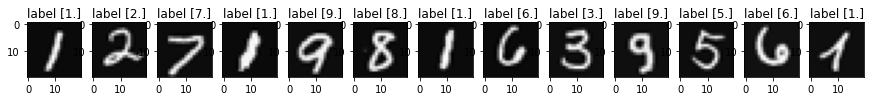

In [4]:
plt.figure(figsize=(15,8))
for i in range(13):
    c = random.randint(X.shape[0])
    a = X[c,1:].reshape((20, 20))
    a=np.transpose(a)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(y[c]))
    plt.imshow(a,cmap='gray')

In [7]:
predicting_class = 0

In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [6]:
def predict(x_bar,params):
    return sigmoid(np.dot(x_bar,params))

In [8]:
def compute_cost(X,Y,theta):
    cost = 0
    for x,y in zip(X,Y):
        y_hat = predict(x,theta)
        y_binary = 1 if y== predicting_class else 0
        cost+= y_binary * np.log(y_hat) + (1-y_binary)  * np.log(1-y_hat)
    return cost


In [ ]:
def gradient(X, Y, theta, iter):
    iterations = 1
    while iterations < iter:
        for i, xy in enumerate(zip(X, Y)):
            y_hat = predict(xy, theta)
            y = 1 if y== predicting_class else 0
            grad = (y-y_hat)